# Novel Gradient-Descent Model for Max Cut Problem

This Jupyter Notebook demonstrates a novel approach to solving the Max Cut problem using a gradient-descent model. The Max Cut problem is a well-known problem in computer science and combinatorial optimization, where the goal is to partition the vertices of a graph into two subsets such that the number of edges between the subsets is maximized.

## Summary

The notebook is structured as follows:

1. **Library Imports**: Necessary libraries such as `numpy`, `time`, and `matplotlib` are imported for matrix operations, timing, and plotting, respectively.

2. **Data Loading and Initialization**: 
    - The adjacency matrix of the graph is loaded from a `.npy` file.
    - The matrix is processed to ensure all values are positive.
    - Row sums are calculated and used to normalize the adjacency matrix.
    - Initial codeword vector is set to ones.

3. **Visualization**:
    - The adjacency matrix is visualized using a heatmap to provide an initial understanding of the graph structure.

4. **Gradient-Descent Algorithm**:
    - Various parameters for the gradient-descent algorithm are initialized.
    - An annealing step function is defined to control the number of indices updated in each iteration.
    - The main loop of the gradient-descent algorithm iterates up to 2000 times, updating the adjacency matrix and codeword vector based on calculated gradients.
    - The satisfaction level of the current partition is calculated and tracked.
    - The algorithm includes mechanisms to escape local optima by flipping significant indices when the satisfaction level stagnates.

5. **Results**:
    - The final results, including the number of vertices, total iterations, maximum satisfaction level, and the best time to achieve this satisfaction, are printed.

This approach leverages gradient-descent techniques to iteratively improve the partitioning of the graph, aiming to maximize the cut value. The notebook provides a comprehensive workflow from data loading and preprocessing to algorithm implementation and result visualization.


In [1]:
# Library import
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
# Variable initialization
adj_matrix = np.load('./Gsets/Gsets/G18.npy')
(n,m) = adj_matrix.shape
adj_matrix = abs(adj_matrix)
print("matrix shape: ", n,m)

row_sum = np.sum(adj_matrix, axis=1) + 1e-5

adj_matrix_end = np.transpose(adj_matrix/row_sum) + np.identity(n)
adj_matrix = np.identity(n) + adj_matrix

codeword = np.ones(n, dtype=np.float32)# np.ones(n, dtype=np.float32)


matrix shape:  800 800


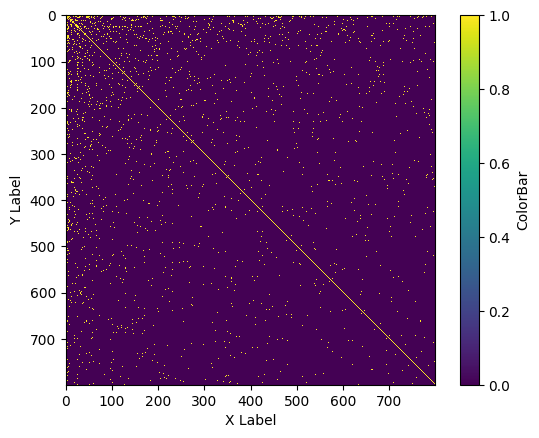

In [3]:
# Plot the adjecent matrix
fig, ax = plt.subplots() 
  
# show image 
shw = ax.imshow(adj_matrix, interpolation="none") 
  
# make bar 
bar = plt.colorbar(shw) 
  
# show plot with labels 
plt.xlabel('X Label') 
plt.ylabel('Y Label') 
bar.set_label('ColorBar') 
plt.show() 

In [5]:
lr_m = 0.001
lr_v = 0.33
max_satisfied = 0

cal_cut = np.zeros(n, dtype = np.float32)
cal_loss = np.zeros(n, dtype = np.float32)
grad_update = np.zeros(n, dtype = np.float32)
codeword_now = np.zeros(n, dtype = np.float32)

iteration = 0
last_sat = 0
count_single_flip = 0
repeat_iteration = 0

best_time = []

max_list = []

sat_list = []

start_time = time.time()
significant_idx = np.zeros(n)
best_iteration = 0

def annealing_step(n, iteration):
    return int(n*np.exp(-np.log(1 + iteration/1000)))

while iteration < 2000:

    num_idx = annealing_step(n, iteration)

    random_idx = np.random.randint(0,n,annealing_step(n, iteration))

    cal_cut = np.dot(adj_matrix, np.sign(codeword))

    maxi = np.max(abs(cal_cut))
    mini = np.min(abs(cal_cut))

    grad_update = np.sign(cal_cut)*(abs(cal_cut) - mini + 1e-4)/(maxi - mini + 1e-4)

    matrix_w = lr_m*np.tensordot(grad_update, codeword, axes=0)
    matrix_w = matrix_w.reshape((n,n))

    adj_matrix = (adj_matrix*(1-matrix_w)  + (matrix_w)*adj_matrix_end) # np.transpose(np.subtract(adj_matrix, adj_matrix_end)*(cal_loss)*lr_m)
    
    codeword[random_idx] = np.array(codeword*(1-abs(grad_update)*lr_v) - abs(grad_update)*lr_v*grad_update)[random_idx] # lr_v*np.sign(cal_cut)*grad_update

    sat_cal = (np.tensordot(np.sign(codeword), np.sign(codeword), axes = 0))
    sat_cal = sat_cal.reshape((n,n))
    satisfied = int((np.sum(np.sign(adj_matrix_end)*(1-sat_cal))/4))

    sat_list.append(satisfied)

    if satisfied > max_satisfied:
        max_satisfied = satisfied
        best_iteration = iteration
        best_time.append(time.time() - start_time)
        max_list.append(satisfied)
        iteration = 0 

    if last_sat == satisfied and repeat_iteration == 10:

        significant_idx = np.where(abs(grad_update) > 0.5)[0]
        idx = np.random.choice(significant_idx, 1)
        codeword[idx] = -codeword[idx]
        count_single_flip += 1

    elif last_sat == satisfied:
        repeat_iteration += 1

    last_sat = satisfied

    # if satisfied >= H.shape[0] :
    #      break

    iteration += 1
    

In [8]:
print("number of vertices: ", n)
print("Iteration: ", iteration, "(",best_iteration,")")
print("max satisfied: ", max_satisfied)
print("best time: ", best_time[-1])

number of vertices:  800
Iteration:  2000 ( 1 )
max satisfied:  3007
best time:  11.666816234588623
